In [54]:
import numpy as np
import numpy.random as rd
import sys
import matplotlib.pyplot as plt

dataset_num = 200
variance = 0.5
wtflag = 0
learning_rate = 0.4
file_exist = False

batch = 100
epochs = 500

# making dataset

d_set = np.empty((1, 3), dtype=float)
if file_exist:
    tmp = np.load(sys.argv[1])
    d_set = np.append(d_set, tmp)
else:
    prob = rd.randint(0, 8, dataset_num)
    for i in prob:
        '''x = rd.normal(int(i/2)*2-1, variance)
        y = rd.normal(int(i/4)*2-1, variance)
        z = rd.normal(int(i/8)*2-1, variance)'''

        '''x = rd.normal(int(i / 2) * 2 - 1, variance)
        y = rd.normal(int(i / 4) * 2 - 1, variance)'''
        x = rd.randint(0, 2)
        y = rd.randint(0, 2)
        rst = x | y
        d_set = np.append(d_set, [[x, y, rst]], axis=0)
    if wtflag == 1:
        np.save('dataset.npy', d_set)
d_set = np.delete(d_set, 0, 0)


In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [51]:
def multiple_Layer(x, w = [], num_of_output=1, bias=True, learning_rate = 0.01, ftn = 'sigmoid', mode='train' ):
    # add bias
    if bias == True:
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        
    #initialize weight
    if w.size is 0:
        w = np.array(rd.normal(1, 1, (x.shape[1]-1)*num_of_output).reshape(-1, num_of_output))
    
        
    #forwarding
    a = np.dot(x[:, 0:-1] , w.T)
    y_ = sigmoid(a)
    E = 0
    if num_of_output is 1:
        E = np.sum((y_ - x[:, -1])**2) / d_set.shape[0]
    
    #backpropagation delta
    delta = np.sum(y_ - x[:, -1]) / d_set.shape[0] *y_*(1-y_)
    #delta * x
    w_grad = np.array([x[i, 0:-1]*delta[i] for i in range(x.shape[0])])

    correct = 0
    #weight update
    if mode is 'train':
        w = w + np.sum(w_grad, axis=0)*learning_rate
        return w, delta, E
    
    #probable calculate
    elif mode is 'test':
        cnt = np.array(np.abs(y_ - x[:, -1]) < 0.5)
        print(cnt)
        correct = np.sum(cnt)/x.shape[0]*100
        return w, correct, E

1.6555 : train cost, 3.3735 : test cost, 78.60696517412936 : correction
3.3535 : train cost, 3.3735 : test cost, 78.60696517412936 : correction
3.3535 : train cost, 3.3734 : test cost, 78.60696517412936 : correction
3.3534 : train cost, 3.3734 : test cost, 78.60696517412936 : correction
3.3534 : train cost, 3.3584 : test cost, 78.1094527363184 : correction
3.3534 : train cost, 3.3584 : test cost, 78.1094527363184 : correction
3.3534 : train cost, 3.3734 : test cost, 78.60696517412936 : correction
3.3534 : train cost, 3.3583 : test cost, 78.1094527363184 : correction
3.3533 : train cost, 3.3733 : test cost, 78.60696517412936 : correction
3.3533 : train cost, 3.3733 : test cost, 78.60696517412936 : correction
3.3533 : train cost, 3.3733 : test cost, 78.60696517412936 : correction
3.3533 : train cost, 3.3733 : test cost, 78.60696517412936 : correction
3.3533 : train cost, 3.3582 : test cost, 78.1094527363184 : correction
3.3532 : train cost, 3.3732 : test cost, 78.60696517412936 : correct

2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost,

2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost,

2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9003 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost, 100.0 : correction
2.8855 : train cost, 2.9052 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.8861 : test cost, 100.0 : correction
2.8855 : train cost, 2.9054 : test cost,

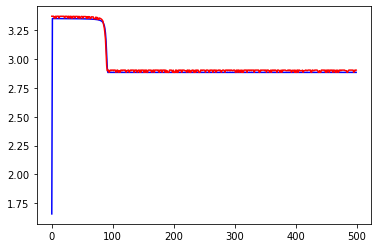

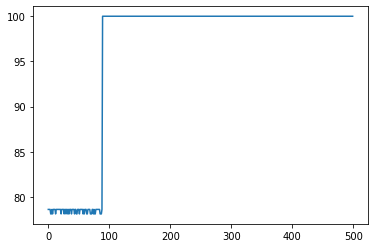

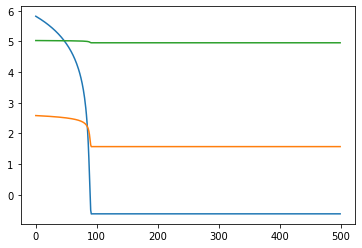

In [60]:
def train(x):
    # initialize weight
    train_hist_E = []
    test_hist_E = []
    correct_hist = []
    w_hist = []
    b = rd.normal(1, 1, 3)

    for i in range(epochs):
        #train run!
        b, delta, E = SGD_single_Layer(d_set, b, learning_rate = learning_rate)
        train_hist_E.append(E)
        w_hist.append(b)

        #making test_set
        test_set = np.empty((1, 3))
        prob = rd.randint(0, 8, dataset_num)
        for i in prob:
            '''x = rd.normal(int(i/2)*2-1, variance)
            y = rd.normal(int(i/4)*2-1, variance)
            z = rd.normal(int(i/8)*2-1, variance)'''
            x = rd.randint(0, 2)
            y = rd.randint(0, 2)
            rst = x | y
            test_set = np.append(d_set, [[x, y, rst]], axis=0)

        #test run!
        test_b, correction, test_E = SGD_single_Layer(test_set, b, mode='test')
        test_hist_E.append(test_E)
        correct_hist.append(correction)
        #print
        print(f'{E:.5} : train cost, {test_E:.5} : test cost, {correction} : correction')

    plt.figure()
    plt.plot(train_hist_E, 'b')
    plt.plot(test_hist_E, 'r')
    plt.show()

    plt.figure()
    plt.plot(correct_hist)
    plt.show()
    
    plt.figure()
    plt.plot(w_hist)
    plt.show()
train(1)